In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
c = np.array([(100,50),(150,200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

256


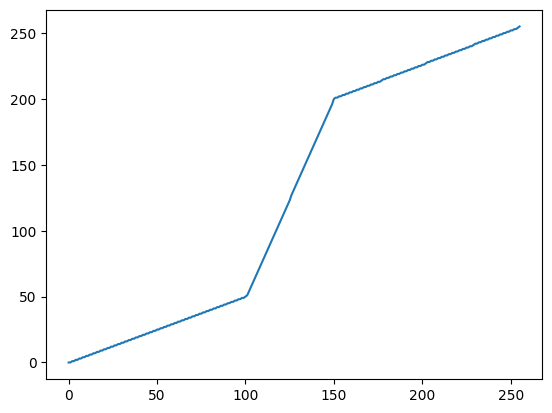

In [5]:
#show transform as a function 
plt.plot(transform)

In [6]:
img_orig = cv.imread('images\emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

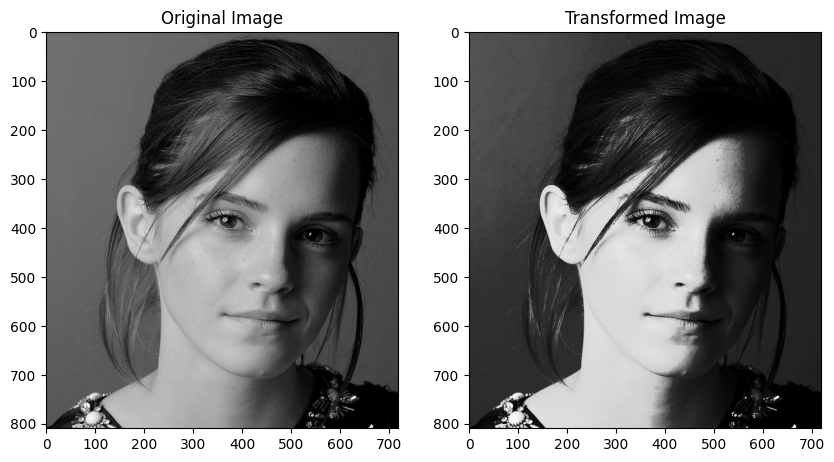

In [7]:
#show the images side by side using matplotlib
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.show()


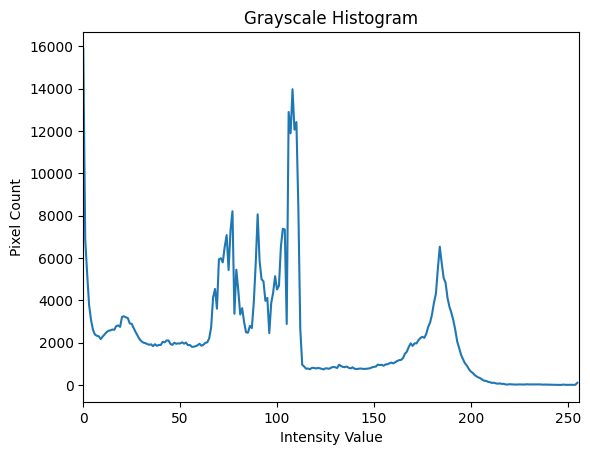

In [8]:
# Calculate the histogram using OpenCV
hist = cv.calcHist([img_orig], [0], None, [256], [0, 256])

# Plot the histogram using Matplotlib
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

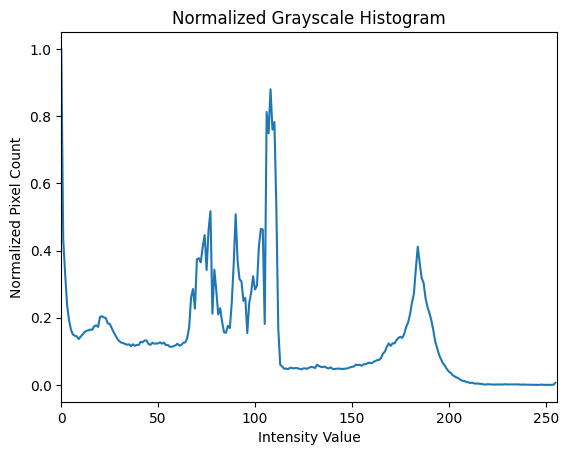

In [9]:
# Normalize the histogram
hist_normalized = cv.normalize(hist, hist, 0, 1, cv.NORM_MINMAX)

# Plot the normalized histogram using Matplotlib
plt.figure()
plt.title("Normalized Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Normalized Pixel Count")
plt.plot(hist_normalized)
plt.xlim([0, 256])
plt.show()

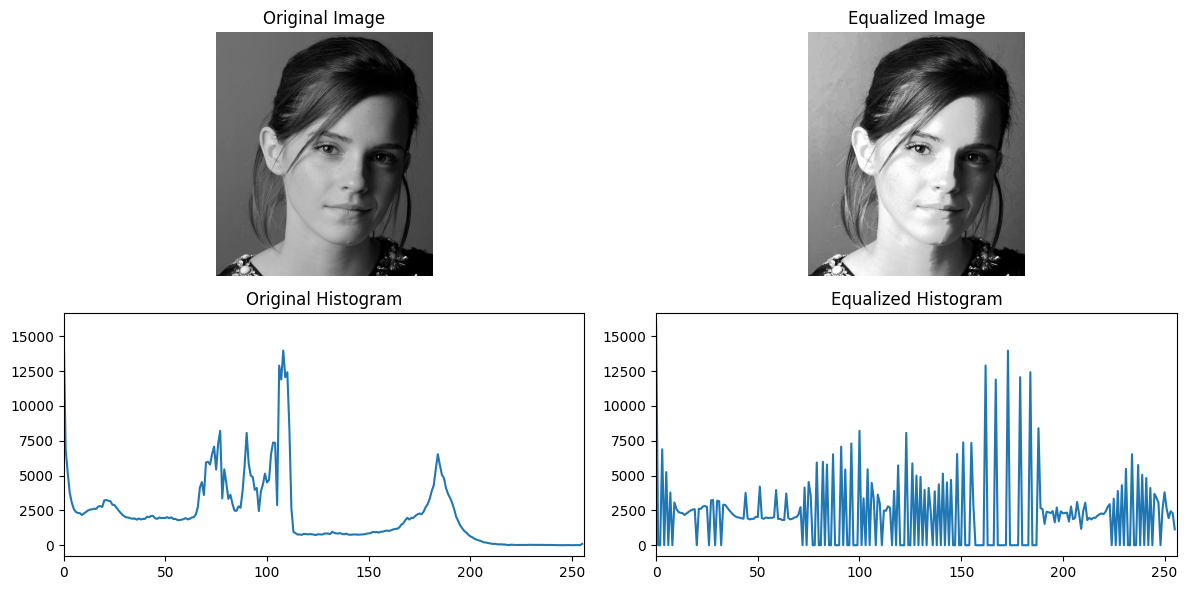

In [13]:
# Perform histogram equalization
img_equalized = cv.equalizeHist(img_orig)

# Calculate histograms before and after equalization
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([img_equalized], [0], None, [256], [0, 256])

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img_orig, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(img_equalized, cmap='gray')
plt.axis('off')

# Plot the histograms
plt.subplot(2, 2, 3)
plt.title("Original Histogram")
plt.plot(hist_orig)
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title("Equalized Histogram")
plt.plot(hist_equalized)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()